# Downside Measures

In [22]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import edhec_risk_kit as erk
import numpy as np
from scipy.stats import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
hfi = erk.get_hfi_returns()

### SemiDeviation

In [7]:
hfi.std(ddof=0) #ddof=0 will return the population std dev

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

The standard deviation above includes both the positive deviation as well as the negative deviation. Since we are only concerned about the negative deviation, as positive deviation is not a bad thing, it would be better to calculate only the negative std dev.

In [8]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

We could do the same thing by calling our function from edhec_risk_kit

In [9]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVar
Value at Risk

- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

In [11]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

The above result gives us the chance of loses. For eg: there's a 5% chance of losing 1.5% or more in Convertible Arbitrage. We can get the values systematically by inc;uding the var_historic function in edhec_risk_kit.py

In [19]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

The norm.ppf function from the stats module gives us the z-score that is how many std devs away from the mean does the percent value lie. We can test first by using 50% which is 0 std devs away from the mean and should therefore return 0. 

In [23]:
norm.ppf(.5)

0.0

Now check the z-score at 5% level. As we can see below, the point lies 1.6 std devs below the mean.

In [24]:
norm.ppf(.05)

-1.6448536269514729

The below results give us the value at risk calculated using parametric gaussian method.

In [25]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

Even though we have calculated the z-score for the data considering Gaussian distribution, we know the data doesn't follow Normal distribution. Consequently, the skewness is not 0 and the kurtosis is not 3. So, we need to add this adjustment, that is exactly what is done in Cornish-Fisher method.

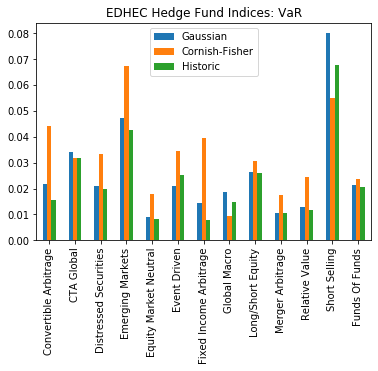

In [27]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### Beyond VaR aka CVaR

The intuition behind CVaR is that if that worst 5% happens for example then in a month, on an average loses would be 3.6% if invested in Convertible Arbitrage.

In [28]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64